# Python Chart Gallery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

source: http://insideairbnb.com/get-the-data.html

Here I'm using the Airbnb London listings summary data

In [2]:
df = pd.read_csv('data/listings.csv',index_col=False)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Guy,NaN,Haringey,51.587767,-0.105666,Private room,35,1,133,2018-08-13,1.69,4,299
1,39387,Stylish bedsit in Notting Hill ish flat.,168920,Alec,NaN,Westminster,51.525888,-0.199425,Private room,35,3,7,2018-07-15,0.13,1,0
2,90663,11: Heart of London - Charing Cross,488602,Harumi,NaN,Westminster,51.507800,-0.122597,Entire home/apt,231,4,9,2018-05-14,0.20,2,289


## Bar Charts
with all the chart attributes you need to show

### Standard Bars

#### How many listings for each room type?

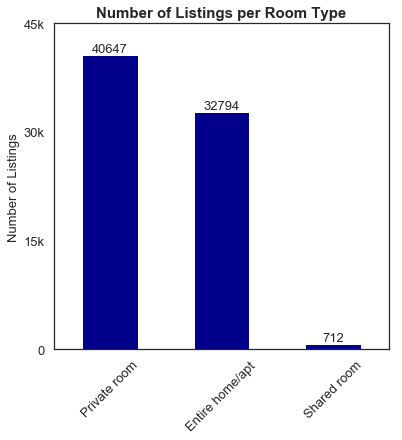

In [52]:
sns.set(style='white')
ax = df['room_type'].value_counts().plot.bar(color='darkblue',figsize=(6,6),fontsize=13)


plt.title('Number of Listings per Room Type',fontsize=15,fontweight='bold')
plt.ylabel('Number of Listings',fontsize=13)

# customize ticks for clean looks
ax.set_yticks([0,15000,30000,45000])
ax.set_yticklabels(['0','15k','30k','45k'])
ax.set_xticklabels(df['room_type'].unique())
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='center')

# make data labels
labels = df['room_type'].value_counts()
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom',fontsize=13)

#### What's the average price of each room type?

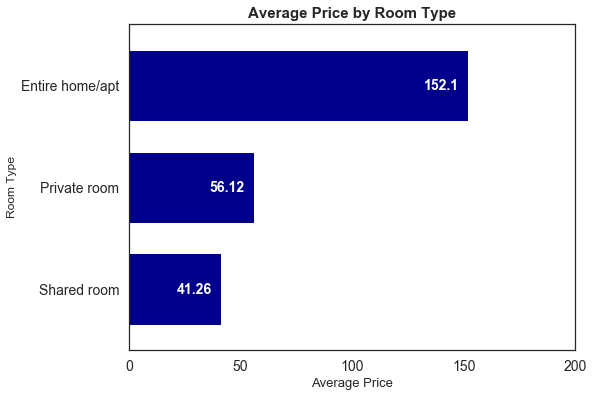

In [54]:
# same charts but with horizontal bar

ax = df.groupby(['room_type'])['price'].mean().sort_values(ascending=True).plot.barh(color='darkblue',
                                                                                     figsize=(8,6),fontsize=14,
                                                                                    width=0.7)

plt.title('Average Price by Room Type',fontsize=15,fontweight='bold')
plt.xlabel('Average Price',fontsize=13)
plt.ylabel('Room Type')

# customize ticks for clean looks
ax.set_xticks([0,50,100,150,200])

#ax.set_xticklabels(['0','15k','30k','45k'], fontsize=12)


# make data labels
labels = df.groupby(['room_type'])['price'].mean().round(decimals=2).sort_values(ascending=True)

rects = ax.patches
for i, v in enumerate(labels):
    ax.text(v - 20, i-0.05 , str(v), color='white', fontweight='bold',fontsize=14)

### Stacked

Now say we want to know the distribution of room types in neighbourhoods with highest number of listings. We will visualize only the top 5.

In [10]:
top_neighbourhoods = df.neighbourhood.value_counts().sort_values(ascending=False)[:5]
top_neighbourhoods

Westminster               7885
Tower Hamlets             7247
Hackney                   5653
Kensington and Chelsea    5274
Camden                    5124
Name: neighbourhood, dtype: int64

Next we make the charts

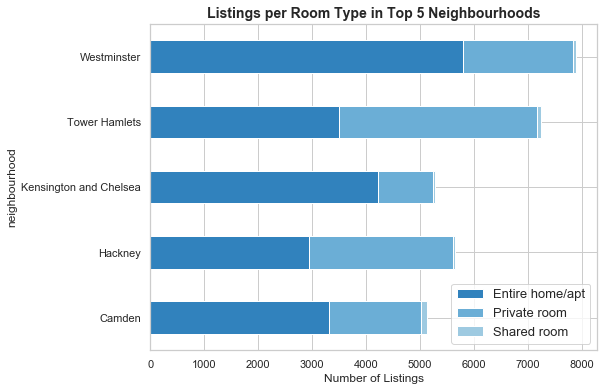

In [68]:
sns.set(style='whitegrid')
# pick color
cmap=plt.cm.get_cmap('tab20c')
colors = [cmap(0),cmap(1),cmap(2)]

#draw chart
df[df.neighbourhood.isin(top_neighbourhoods.index)].groupby(['neighbourhood','room_type'])['id'].count().unstack('room_type').plot.barh(stacked=True
                                                                                                                                       ,color = colors
                                                                                                                                     ,figsize=(8,6))
plt.title('Listings per Room Type in Top 5 Neighbourhoods',fontsize=14,fontweight='bold')
plt.legend(['Entire home/apt','Private room','Shared room'],fontsize=13)
plt.xlabel('Number of Listings')


### 100% Stacked

This is a modification of https://python-graph-gallery.com/13-percent-stacked-barplot/

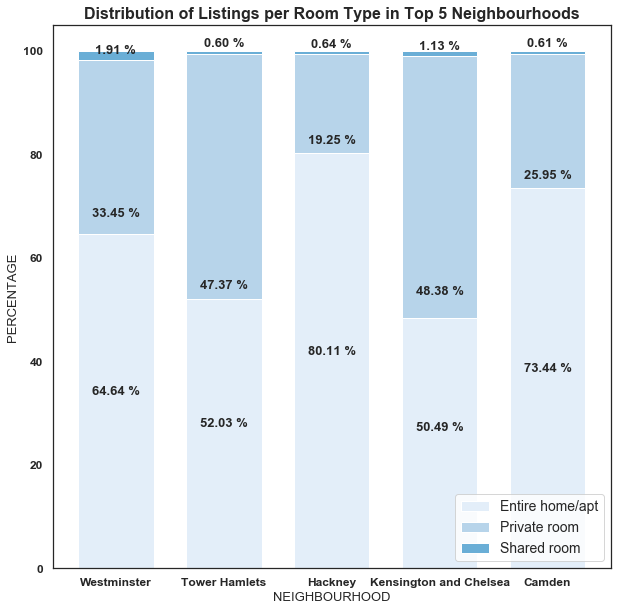

In [385]:
# Data
sns.set(style='white')
r = range(1,6)
data = df[df.neighbourhood.isin(top_neighbourhoods.index)].groupby(['neighbourhood','room_type'])['id'].count().unstack('room_type')
  

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(data['Entire home/apt'], data['Private room'], data['Shared room'])]
bar1 = [i / j * 100 for i,j in zip(data['Entire home/apt'], totals)]
bar2 = [i / j * 100 for i,j in zip(data['Private room'], totals)]
bar3 = [i / j * 100 for i,j in zip(data['Shared room'], totals)]
 
# plot
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
cmap=plt.cm.get_cmap('Blues')
colors = [cmap(0.1),cmap(0.3),cmap(0.5)]

barWidth = 0.7
names = (top_neighbourhoods.index)
# Create green Bars
plt.bar(r, bar1, color=colors[0], edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, bar2, bottom=greenBars, color=colors[1], edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, bar3, bottom=[i+j for i,j in zip(bar1, bar2)], color=colors[2], edgecolor='white', width=barWidth)
 
# Custom axis label
plt.xticks(r, names)
plt.xlabel("NEIGHBOURHOOD",fontsize=13)
plt.ylabel('PERCENTAGE',fontsize=13)
plt.rc('ytick', labelsize=13)
plt.setp(plt.gca().get_xticklabels(),fontsize=12,weight='bold')
plt.setp(plt.gca().get_yticklabels(),fontsize=12,weight='bold')

plt.title('Distribution of Listings per Room Type in Top 5 Neighbourhoods',fontweight='bold',fontsize=16)

'''
# Shrink current axis to make space for legend (if you want axis to be outside the plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
'''

plt.legend(['Entire home/apt','Private room','Shared room'],loc=4, fontsize=14)
for p in ax.patches[::-1]:
    if p.get_height()<50:
        h = (100-p.get_height())
    else:
        h = p.get_height()/2
    x = p.get_x()+p.get_width()/2
    if h != 0:
        ax.annotate("%.2f %%" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=0, 
                   textcoords="offset points", ha="center", va="bottom",weight='bold',
                   fontsize=13)

plt.show()


### Two Side Horizontal Bars

It might be interesting to see how much we can save by choosing shared room instead of private room. So lets
lets compare the average price of private room and shared room.

We want to only include neighborhood that has at least 50 rooms for each type in each neighbourhood. Otherwise we can't be too convinced that the price difference is actually valid.

In [85]:
room_comparison = df[df.room_type != 'Entire home/apt'].groupby(['neighbourhood','room_type']).price.mean().reset_index().merge(df[df.room_type != 'Entire home/apt'].groupby(['neighbourhood','room_type']).id.nunique().reset_index(), on=['room_type','neighbourhood'])

# exclude neighborhood with less than 50 rooms for each type
ngh_excluded = room_comparison[room_comparison.id<50].neighbourhood
room_comparison = room_comparison[~room_comparison.neighbourhood.isin(ngh_excluded)]
room_comparison

,neighbourhood,room_type,price,id
10,Camden,Private room,70.599183,1714
11,Camden,Shared room,34.846939,98
54,Southwark,Private room,55.213978,2089
55,Southwark,Shared room,30.375000,72
58,Tower Hamlets,Private room,49.510522,3659
59,Tower Hamlets,Shared room,31.573171,82


We only got 3 neighbourhood in which we can compare

In [32]:
room_comparison.neighbourhood.unique()

array(['Camden', 'Southwark', 'Tower Hamlets'], dtype=object)

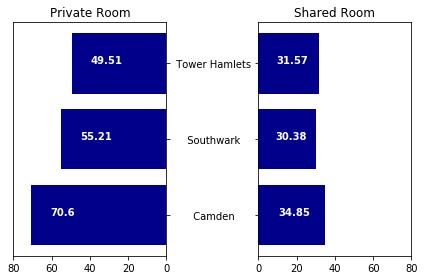

In [113]:
y = [1,2,3]
private = room_comparison[room_comparison.room_type=='Private room'].price
shared = room_comparison[room_comparison.room_type=='Shared room'].price

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, private, align='center', color='darkblue')
axes[0].set(title='Private Room')
axes[0].set_xticks([0,20,40,60,80])


    
axes[1].barh(y, shared, align='center', color='darkblue')
axes[1].set(title='Shared Room')
axes[1].set_xticks([0,20,40,60,80])
axes[0].invert_xaxis()


# add spaces to neighbourhood names so the chart looks neat
#room_comparison['neighbourhood'] = '                          ' + room_comparison['neighbourhood']

axes[0].set(yticks=y, yticklabels=room_comparison.neighbourhood.unique())
axes[0].yaxis.tick_right()
fig.tight_layout()
fig.subplots_adjust(wspace=0.6)
for label in axes[0].get_yticklabels():
    label.set_horizontalalignment('center')

rects = axes[0].patches
for i, v in enumerate(private):
    rounded = round(v,2)
    axes[0].text(rounded - 10 , i+1 , str(rounded), color='white', fontweight='bold',fontsize=10)
    
rects = axes[1].patches
for i, v in enumerate(shared):
    rounded = round(v,2)
    axes[1].text(rounded*0.3 , i+1 , str(rounded), color='white', fontweight='bold',fontsize=10)


plt.show()

## Doughnut Pie Chart

Suppose someone is planning a budget for a trip, and he's considering to stay in Camden. He considers price per night of <=50 is cheap, 50-100 is okay, and >100 is expensive. Now he wants to figure out, based on his price classification, is Camden generally expensive?

In [170]:
def get_price_category(x):
    if x<=50:
        return 'cheap'
    elif x>100:
        return 'expensive'
    else:
        return 'okay'

In [174]:
df['his_price_category'] = df.price.apply(get_price_category)
# check result
df[['price','his_price_category']].head()

,price,his_price_category
0,35,cheap
1,35,cheap
2,231,expensive
3,51,okay
4,105,expensive


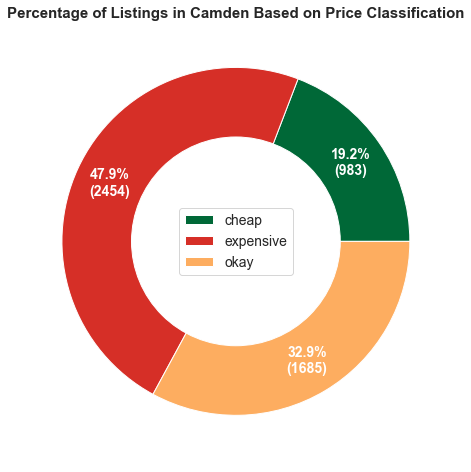

In [216]:

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
my_circle=plt.Circle( (0,0), 0.7, color='white')

# pick colors
cmap=plt.cm.get_cmap('RdYlGn')
colors = [cmap(1.3),cmap(0.1),cmap(0.3)]


def func(pct, allvals):
    # calculate percentage for data labels
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


data = df[df.neighbourhood=='Camden'].groupby('his_price_category')['id'].count().values

# plot and texts
wedges, texts, autotexts = plt.pie(df[df.neighbourhood=='Camden'].groupby('his_price_category')['id'].count(), 
                                   colors=colors,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="b"),pctdistance=0.8)

plt.setp(autotexts, size=14,weight='bold',color='white')

# adding attributes
ax.set_title("Percentage of Listings in Camden Based on Price Classification",fontsize=15,weight='bold')
labels = df[df.neighbourhood=='Camden'].groupby('his_price_category')['id'].count().index
plt.legend(labels,fontsize=14,loc='center')
 
# add circle
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()


## Comparing Two Values

#### Is Hackney Cheaper than Camden?

Now say we want to compare the price in Camden and Hackney based on the room type

In [352]:
# transform the data
grouped = df[df.neighbourhood.isin(['Camden','Hackney'])].groupby(['neighbourhood','room_type'])
chart_df= grouped.agg({'price': pd.Series.mean})
chart_df = chart_df.unstack('neighbourhood').reset_index()
chart_df

room_type       price            
neighbourhood                       Camden     Hackney
0              Entire home/apt  165.636473  117.480449
1                 Private room   70.599183   49.348021
2                  Shared room   34.846939   47.088235

In [353]:
# put axis setting in the dataset
chart_df['yaxis_pos'] = range(1,len(chart_df)+1)
# reverse y position
chart_df['yaxis_pos'] = len(chart_df)+1-chart_df['yaxis_pos']
chart_df.head()

room_type       price             yaxis_pos
neighbourhood                       Camden     Hackney          
0              Entire home/apt  165.636473  117.480449         3
1                 Private room   70.599183   49.348021         2
2                  Shared room   34.846939   47.088235         1

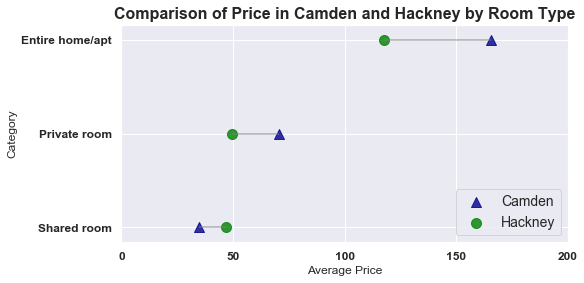

In [380]:
# make the chart 
# https://python-graph-gallery.com/184-lollipop-plot-with-2-groups/

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(8,4))

data1 = chart_df.price.Camden
data2 = chart_df.price.Hackney
my_range=chart_df.yaxis_pos
labels = ['Camden','Hackney'] # labels for legend

plt.hlines(y=my_range, xmin=data1, xmax=data2, color='grey', alpha=0.6)
plt.scatter(data1, my_range, color='darkblue', alpha=0.8, label=labels[0],marker="^", s=100)
plt.scatter(data2, my_range, color='green', alpha=0.8 , label=labels[1],s=100)
plt.legend(fontsize=14, loc=4)

#axis labeling
plt.yticks(my_range, chart_df.room_type,fontsize='large')
plt.yticks(my_range, chart_df.room_type,fontsize='large')
plt.title('Comparison of Price in Camden and Hackney by Room Type', loc='center', fontsize=16,fontweight='bold')
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks([0,50,100,150,200])
ax.set_xticklabels([0,50,100,150,200],fontsize=12,weight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12,weight='bold')



## Line Charts

### Single Line

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Guy,NaN,Haringey,51.587767,-0.105666,Private room,35,1,133,2018-08-13,1.69,4,299,2018-08-13
1,39387,Stylish bedsit in Notting Hill ish flat.,168920,Alec,NaN,Westminster,51.525888,-0.199425,Private room,35,3,7,2018-07-15,0.13,1,0,2018-07-15
2,90663,11: Heart of London - Charing Cross,488602,Harumi,NaN,Westminster,51.507800,-0.122597,Entire home/apt,231,4,9,2018-05-14,0.20,2,289,2018-05-14
3,90681,Beautiful Attic suite balcony views,491199,Gillian,NaN,Lewisham,51.447624,-0.057157,Private room,51,2,50,2018-09-28,0.69,1,318,2018-09-28
4,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.510741,-0.198534,Entire home/apt,105,2,302,2018-09-20,3.41,1,235,2018-09-20


### Multilines

In [3]:
df['last_review_date'] = pd.to_datetime(df.last_review,errors='coerce')

In [13]:
top_neighbourhoods = top_neighbourhoods.reset_index()
top_neighbourhoods.head()

,index,neighbourhood
0,Westminster,7885
1,Tower Hamlets,7247
2,Hackney,5653
3,Kensington and Chelsea,5274
4,Camden,5124


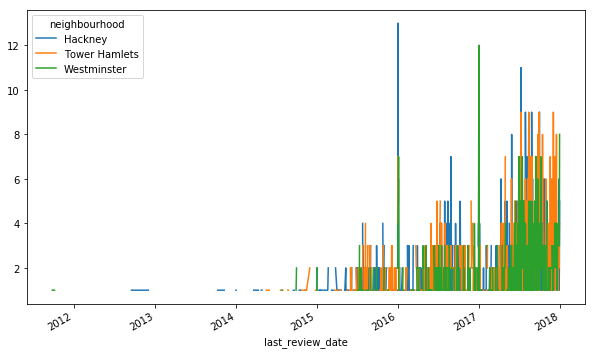

In [19]:
df[(df.last_review_date.dt.year<2018) & (df.neighbourhood.isin(['Westminster','Tower Hamlets','Hackney']))].groupby(['last_review_date','neighbourhood']).count()['id'].unstack().plot(figsize=(10,6))

## Bar & Line Chart Combination

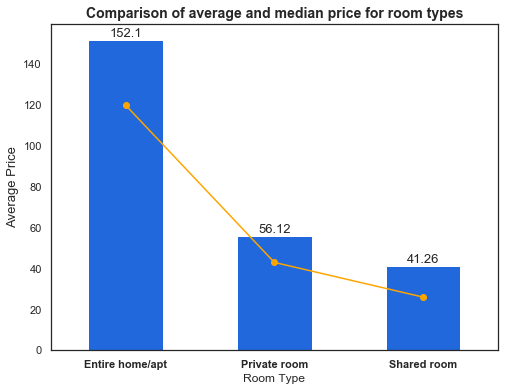

In [24]:
sns.set(style='white')
plt.figure(figsize=(8,6))

# plot line
lx = df.groupby(['room_type'])['price'].median().plot(marker='o',color='orange')

# plot bar
ax = df.groupby(['room_type'])['price'].mean().plot.bar(color=['#2068db','#2068db','#2068db'])

# put details
plt.title('Comparison of average and median price for room types', weight='bold',fontsize=14)
plt.ylabel('Average Price',fontsize=13)
plt.xlabel('Room Type')
plt.setp(plt.gca().get_xticklabels(), rotation=0, horizontalalignment='center',weight='bold')

labels = df.groupby(['room_type'])['price'].mean().round(decimals=2).sort_values(ascending=False)
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.005, label,
            ha='center', va='bottom',fontsize=13)
    

    
